In [299]:
import requests

url = 'https://kata.geosci.ai/challenge/boreholes'

r = requests.get(url)
print(r.text)

# Boreholes

You have a list of boreholes. Each one has an (x, y) location. The locations are given as a Python string, and look like this:

    ..., (12.1, 34.3), (56.5, 78.7), (90.9, 12.1),...
    
Your data, when you receive it, will be longer than this.
    
We're going to analyse these locations. We need the answers to the following questions:

1. How many boreholes are there? We'll call this number _n_.
2. What's the distance, **to the nearest metre** between the first two boreholes in the list?
3. What is the mean straight-line distance between all pairs of boreholes **to the nearest metre**? Call this _m_.
4. There is a clump of boreholes. How many boreholes are in the clump? (A borehole is defined to be in a clump if the mean distance to its nearest _n_ / 5 neighbours is _m_ / 4 or less.)

Please note that all your answers must be integers. If you get a float for an answer, round it.


## Example

Here are the locations of some boreholes:

      (1, 4), (5, 4), (9, 3), (2, 8),

In [300]:
key = 'grajohnt'
qurl = 'https://kata.geosci.ai/challenge/boreholes?key='+key  # <--- In week 2, you'll change the name

r = requests.get(qurl)
boreholes = r.text
#print(boreholes)

In [301]:
question = 1
# 1. How many boreholes are there? We'll call this number _n_.

# Regex to the rescue again - the naming isn't necessary
import regex
coords = regex.findall("(?<x>\d+.\d+), (?<y>\d+.\d+)",boreholes)
n = len(coords)

print(str(int(n/5)))

110


In [302]:
# Submit

aurl = qurl+'&question='+str(question)+'&answer='+str(len(coords))
print(aurl)
r = requests.get(aurl)
print(r.text)

https://kata.geosci.ai/challenge/boreholes?key=grajohnt&question=1&answer=550
Correct


In [303]:
question = 2
# What's the distance, **to the nearest metre** between the first two boreholes in the list?

# Euclidian distance - nbd
import math
dist = math.sqrt( ((float(coords[1][0]) - float(coords[0][0]))**2) + ((float(coords[1][1]) - float(coords[0][1]))**2) )

# Round it off
print(str(int(round(dist,0))))

5891


In [304]:
# Submit

aurl = qurl+'&question='+str(question)+'&answer='+str(int(round(dist,0)))  # <--- In week 2, you'll change the name
print(aurl)
r = requests.get(aurl)
print(r.text)

https://kata.geosci.ai/challenge/boreholes?key=grajohnt&question=2&answer=5891
Correct


In [305]:
question = 3
#3. What is the mean straight-line distance between all pairs of boreholes **to the nearest metre**? Call this _m_.

# This calls for a function
def dist(p1,p2):
    (x1,y1),(x2,y2) = p1, p2
    return math.sqrt((float(x2)-float(x1))**2+(float(y2)-float(y1))**2)

# itertools can provide all point-point combinations...
from itertools import combinations
dists = [dist(p1,p2) for p1,p2 in combinations(coords, 2)]

avg_dist = sum(dists)/len(dists)

# Round it off
print(str(int(round(avg_dist,0))))
m = int(round(avg_dist,0))

11615


In [306]:
# Submit 

aurl = qurl+'&question='+str(question)+'&answer='+str(int(round(avg_dist,0)))
print(aurl)
r = requests.get(aurl)
print(r.text)

https://kata.geosci.ai/challenge/boreholes?key=grajohnt&question=3&answer=11615
Correct


In [307]:
question = 4

#There is a clump of boreholes. How many boreholes are in the clump?
# (A borehole is defined to be in a clump if the mean distance to its nearest _n_ / 5 neighbours is _m_ / 4 or less.)

In [308]:
# Change the string coords into a numpy array of floats

import numpy as np
c = np.asarray(coords)
c = c.astype(float)


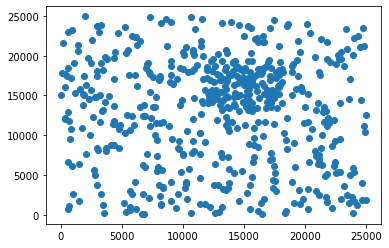

In [309]:
# Quick view of the boreholes - not necessary

import matplotlib.pyplot as plt
zip(*c)
plt.scatter(*zip(*c))
plt.show()

In [315]:
# Scipy has a good way of computing point distances

from scipy.spatial.distance import pdist
pdc = pdist(c)

round(np.mean(pdc),0) # Could have computed the mean distance this way more concisely

11615.0

In [311]:
# This turns the condensed matrix into a square matrix
#  maybe not necessary, but easier for me to understand

from scipy.spatial.distance import squareform
pdm = squareform(pdc)
pdm

array([[    0.        ,  5891.21626403, 13434.68561199, ...,
        15403.27225672, 12208.65775759, 14302.47851263],
       [ 5891.21626403,     0.        , 16652.94730796, ...,
        17804.41014539, 13993.04914582, 17232.75259869],
       [13434.68561199, 16652.94730796,     0.        , ...,
         2946.68630202,  4254.32943212,  1144.45500379],
       ...,
       [15403.27225672, 17804.41014539,  2946.68630202, ...,
            0.        ,  3928.18483227,  1832.40631853],
       [12208.65775759, 13993.04914582,  4254.32943212, ...,
         3928.18483227,     0.        ,  4078.15798136],
       [14302.47851263, 17232.75259869,  1144.45500379, ...,
         1832.40631853,  4078.15798136,     0.        ]])

In [312]:
# Use heapq to find the smallest distances of n/5 points

import heapq
clump = 0
for pdmr in pdm:
    top = pdmr[heapq.nsmallest(int(n/5)+1, range(len(pdmr)),pdmr.take)]
    top = np.delete(top,[0]) # Shortest is itself, which is 0 - must delete (grr)
    # Check if the avg of the distances is less than m/4
    if np.mean(top) <= m/4:
        clump = clump+1        

print(str(clump))


138


In [313]:
# Submit
aurl = qurl+'&question='+str(question)+'&answer='+str(clump)  # <--- In week 2, you'll change the name
print(aurl)
r = requests.get(aurl)
print(r.text)

https://kata.geosci.ai/challenge/boreholes?key=grajohnt&question=4&answer=138
Correct! The next challenge is: https://kata.geosci.ai/challenge/sample-names - good luck!


In [316]:
# An alterative way to compute the distance matrix from sklearn - generates the same matrix as above
from sklearn.neighbors import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
dists = dist.pairwise(c)
dists


array([[    0.        ,  5891.21626403, 13434.68561199, ...,
        15403.27225672, 12208.65775759, 14302.47851263],
       [ 5891.21626403,     0.        , 16652.94730796, ...,
        17804.41014539, 13993.04914582, 17232.75259869],
       [13434.68561199, 16652.94730796,     0.        , ...,
         2946.68630202,  4254.32943212,  1144.45500379],
       ...,
       [15403.27225672, 17804.41014539,  2946.68630202, ...,
            0.        ,  3928.18483227,  1832.40631853],
       [12208.65775759, 13993.04914582,  4254.32943212, ...,
         3928.18483227,     0.        ,  4078.15798136],
       [14302.47851263, 17232.75259869,  1144.45500379, ...,
         1832.40631853,  4078.15798136,     0.        ]])